In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
assets_df = pd.read_csv('../../../datasets/b3_dados/processed/acoes_concat.csv')


1. **Gráficos de Linhas: Evolução Temporal** \
\
Objetivo: Mostrar como os preços de uma ou mais ações variam ao longo do tempo.

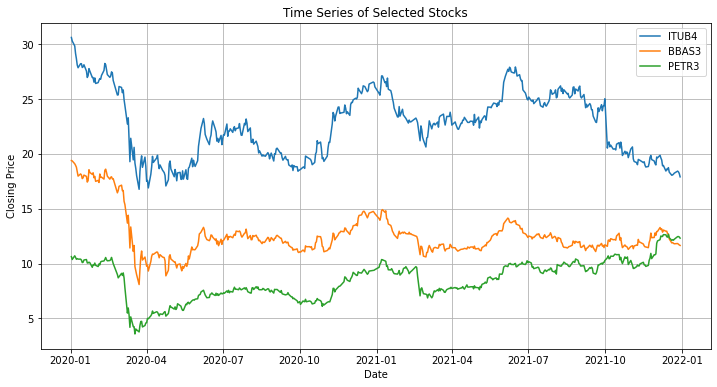

In [13]:

def plot_time_series(data, stocks, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    filtered_data = data.copy()
    filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    for stock in stocks:
        plt.plot(filtered_data['Date'], filtered_data[stock], label=stock)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Time Series of Selected Stocks')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplos
plot_time_series(assets_df, ['ITUB4', 'BBAS3', 'PETR3'], start_date='2020-01-01', end_date='2022-01-01')



Também podemos obter esse gráfico utilazando a biblioteca **Bokeh**. Usando essa biblioteca obtemos um gráfico interativo.

In [ ]:
#instale a biblioteca
%pip install bokeh

In [7]:
from bokeh.plotting import figure, show
from bokeh.palettes import Category20

def plot_chart_bokeh(data):
    
    # Converter a coluna 'Date' para datetime
    df = data.copy()
    df['Date'] = pd.to_datetime(df['Date'])

    # lista com o nome das ações
    ls_acoes = list(df.columns[1:])

    ls_acoes

    # Obter o número de ações e as cores correspondentes
    num_acoes = len(ls_acoes)  # Número de ações
    palette = Category20[num_acoes]

    # Criar figura
    p = figure(x_axis_type='datetime', title='Preços de Fechamento - Todas as Ações',
            width=1200, height=600)
    for acao, color in zip(ls_acoes, palette):
        p.line(df['Date'], df[acao], legend_label=acao, line_width=2, color=color)

    p.legend.title = "Ações"
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    show(p)

plot_chart_bokeh(assets_df)

2. **Gráfico de Tendência Média**\
\
Objetivo: Suavizar as flutuações diárias e mostrar tendências gerais.\
\
Técnica: Média móvel (e.g., 7 ou 30 dias).

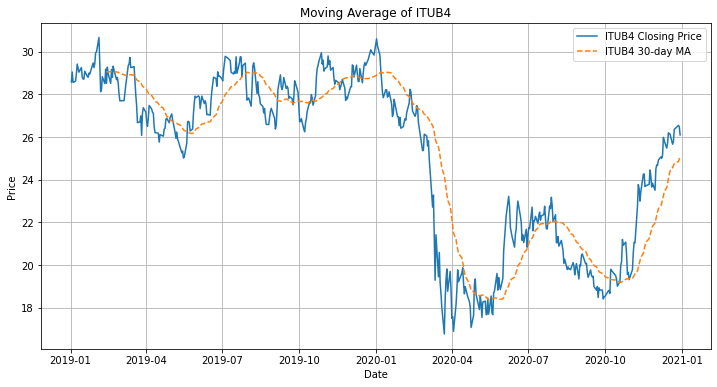

In [14]:
def plot_moving_average(data, stock, window, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    data['Date'] = pd.to_datetime(data['Date'])
    filtered_data = data.copy()
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Calcula a média móvel
    filtered_data[f'{stock}_MA{window}'] = filtered_data[stock].rolling(window=window).mean()
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data[stock], label=f'{stock} Closing Price')
    plt.plot(filtered_data['Date'], filtered_data[f'{stock}_MA{window}'], 
             label=f'{stock} {window}-day MA', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Moving Average of {stock}')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplo
plot_moving_average(assets_df, 'ITUB4', window=30, start_date='2019-01-01', end_date='2021-01-01')


Utilizando a biblioteca **Altair** obtemos um gráfico interativo mostrando a tendência de uma ação especifica com uma regressão polinomial de grau 5.

In [ ]:
#instale a biblioteca
%pip install altair

In [8]:
import altair as alt

df_closestock = assets_df.copy()

df_closestock['Date'] = pd.to_datetime(df_closestock['Date'])

# lista com o nome das ações
ls_acoes = list(df_closestock.columns[1:])

ls_acoes

# Escolher uma ação específica
acao_escolhida = ls_acoes[10]

def plot_chart(df, acao):
    # Criar gráfico da série original
    linha_original = alt.Chart(df).mark_line().encode(
        x=alt.X('Date:T', title='Data'),
        y=alt.Y(f'{acao}:Q', title='Fechamento'),
        tooltip=[alt.Tooltip('Date:T', title='Data'), alt.Tooltip(f'{acao}:Q', title='Preço')]
    ).properties(
        title=f'Tendência de Fechamento - {acao}',
        width=1200,
        height=600
    )

    # Adicionar linha de tendência usando transform_regression
    linha_tendencia = alt.Chart(df).transform_regression(
        'Date', acao, method='poly', order=5
    ).mark_line(color='red', strokeDash=[5, 5]).encode(
        x='Date:T',
        y=f'{acao}:Q'
    )

    # Combinar os gráficos
    chart = (linha_original + linha_tendencia).interactive()

    chart.show()

plot_chart(df_closestock, acao_escolhida)

alt.LayerChart(...)

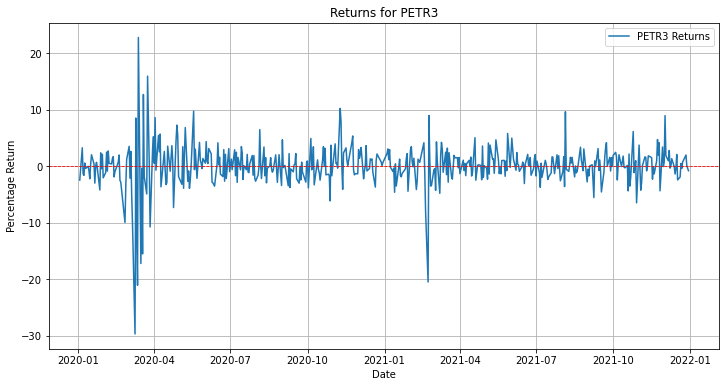

In [15]:
def plot_returns(data, stock, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    data['Date'] = pd.to_datetime(data['Date'])
    filtered_data = data.copy()
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Calcula os retornos percentuais
    filtered_data['Returns'] = filtered_data[stock].pct_change() * 100
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Returns'], label=f'{stock} Returns')
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
    plt.xlabel('Date')
    plt.ylabel('Percentage Return')
    plt.title(f'Returns for {stock}')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplo
plot_returns(assets_df, 'PETR3', start_date='2020-01-01', end_date='2022-01-01')
